# Imports 

In [ ]:
from richardson_lucy_gradient_consensus_2025_06_22 import rlgc_latest
import numpy as np
from skimage.io import imread
import os
import sys
from tnia.plotting.projections import show_xyz_slice_center

sys.path.append('../')

out_path = r'/home/bnorthan/images/tnia-python-images/imagesc/2025_06_22_rlgc_revisit'


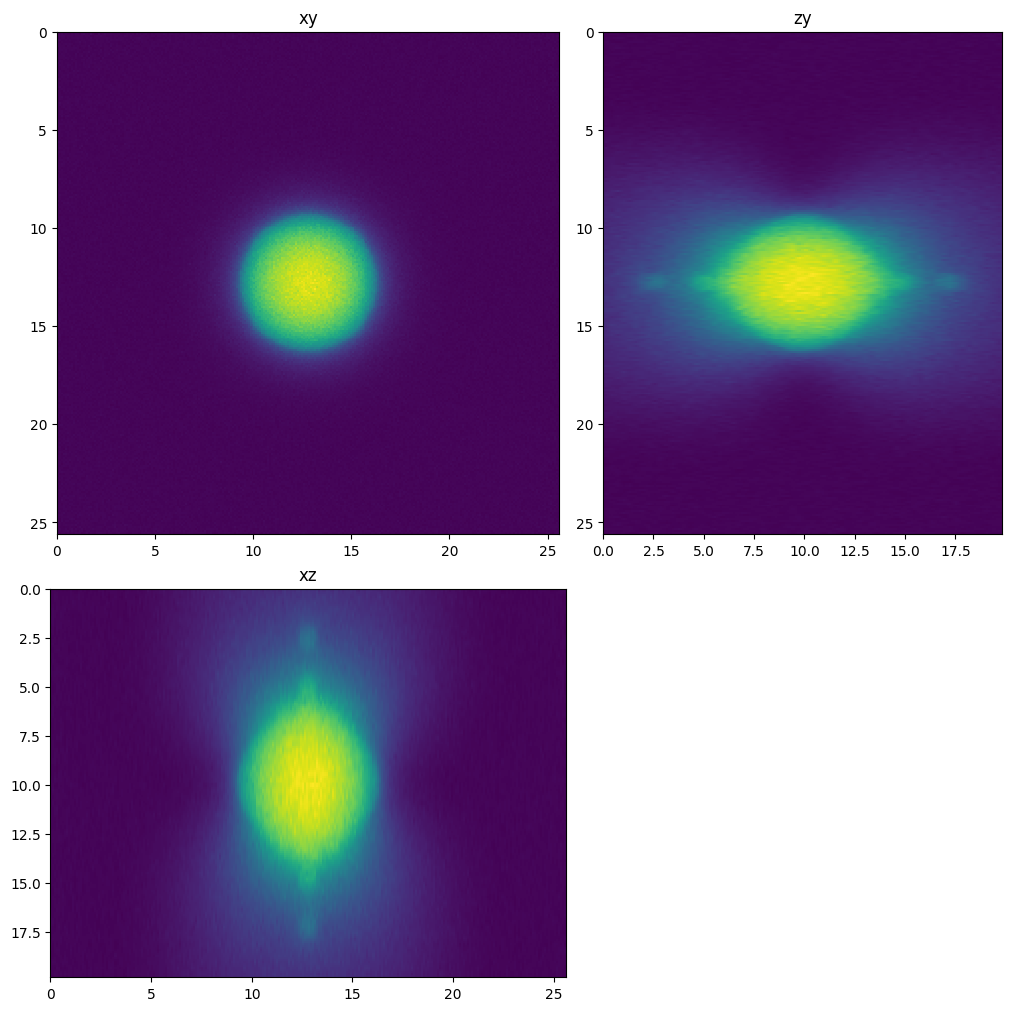

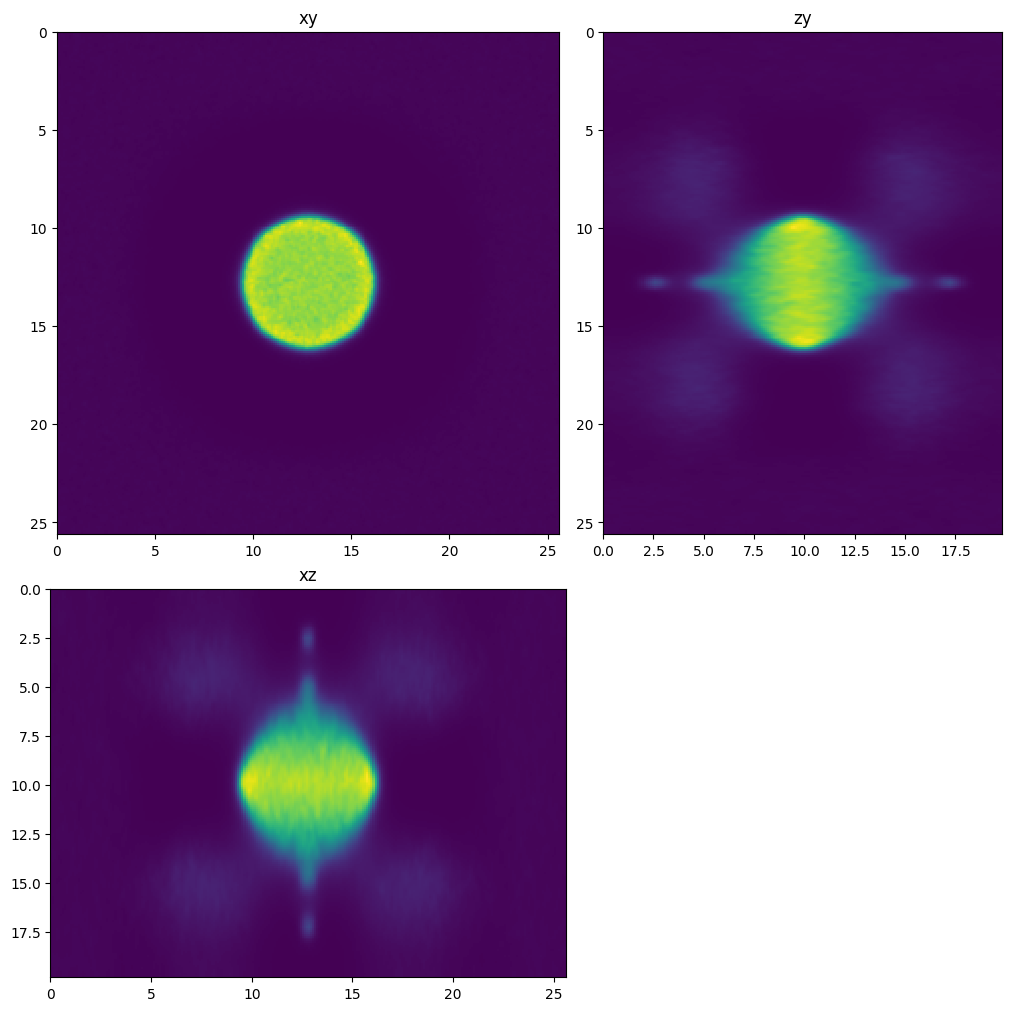

In [2]:
x_voxel_size = 0.1  # in microns
z_voxel_size = 0.3  # in microns

im_name = os.path.join(out_path, 'im.tif')
im = imread(im_name)

psf_name = os.path.join(out_path, 'psf.tif')
psf = imread(psf_name)

reference_rlgc_name = os.path.join(out_path, 'rlgc.tif')
reference_rlgc = imread(reference_rlgc_name)


fig = show_xyz_slice_center(im, sxy=x_voxel_size, sz=z_voxel_size)
fig = show_xyz_slice_center(reference_rlgc, sxy=x_voxel_size, sz=z_voxel_size)

In [ ]:

recon, best_recon, stat, stop_iteration = rlgc_latest(im, psf, 200, False, seed=41)

print(stop_iteration)

Iteration 001 completed in 0.069 s. KLDs = 0.3410 (image), 0.3450 (split 1), 0.3450 (split 2). Update range: 0.96 to 16.74. Largest relative delta = 0.94028.
Iteration 002 completed in 0.068 s. KLDs = 0.0470 (image), 0.0498 (split 1), 0.0497 (split 2). Update range: 0.76 to 1.65. Largest relative delta = 0.39415.
Iteration 003 completed in 0.067 s. KLDs = 0.0282 (image), 0.0308 (split 1), 0.0308 (split 2). Update range: 0.81 to 1.26. Largest relative delta = 0.20635.
Iteration 004 completed in 0.060 s. KLDs = 0.0207 (image), 0.0232 (split 1), 0.0232 (split 2). Update range: 0.80 to 1.16. Largest relative delta = 0.12373.
Iteration 005 completed in 0.059 s. KLDs = 0.0162 (image), 0.0187 (split 1), 0.0187 (split 2). Update range: 0.81 to 1.11. Largest relative delta = 0.08314.
Iteration 006 completed in 0.059 s. KLDs = 0.0132 (image), 0.0158 (split 1), 0.0157 (split 2). Update range: 0.82 to 1.09. Largest relative delta = 0.06435.
Iteration 007 completed in 0.059 s. KLDs = 0.0112 (image)

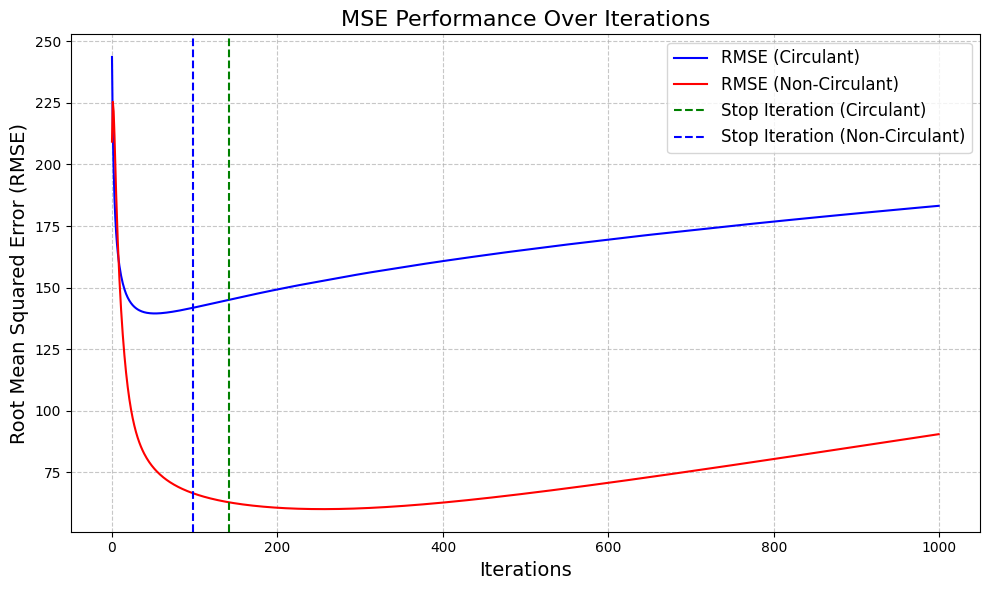

In [16]:
import matplotlib.pyplot as plt

def generate_fig(stats, stats_non_circ, stop_iteration, stop_iteration_non_circ):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the data
    ax.plot(stats['rmse'], label='RMSE (Circulant)', color='blue')
    ax.plot(stats_non_circ['rmse'], label='RMSE (Non-Circulant)', color='red')

    # Add vertical lines for stop iterations
    ax.axvline(x=stop_iteration, color='green', linestyle='--', label='Stop Iteration (Circulant)')
    ax.axvline(x=stop_iteration_non_circ, color='blue', linestyle='--', label='Stop Iteration (Non-Circulant)')

    # Add title and axis labels
    ax.set_title("MSE Performance Over Iterations", fontsize=16)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_ylabel("Root Mean Squared Error (RMSE)", fontsize=14)

    # Add legend
    ax.legend(fontsize=12)

    # Improve grid visibility
    ax.grid(visible=True, linestyle='--', alpha=0.7)

    # Show the
    plt.tight_layout()

    return fig

fig = generate_fig(stat, stat_nc, stop_iteration, stop_iteration_nc)

Text(0.5, 0.98, 'RLGC reconstruction nc stop_iteration=98')

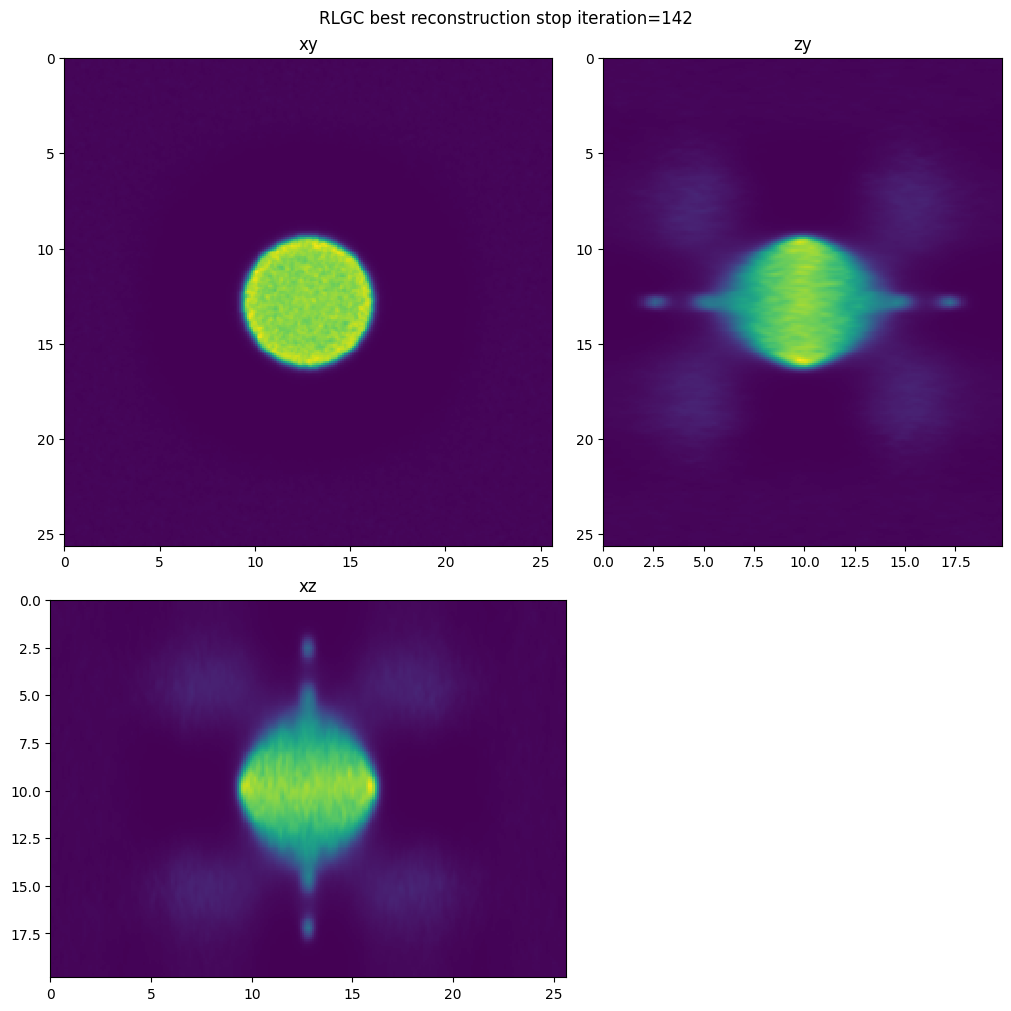

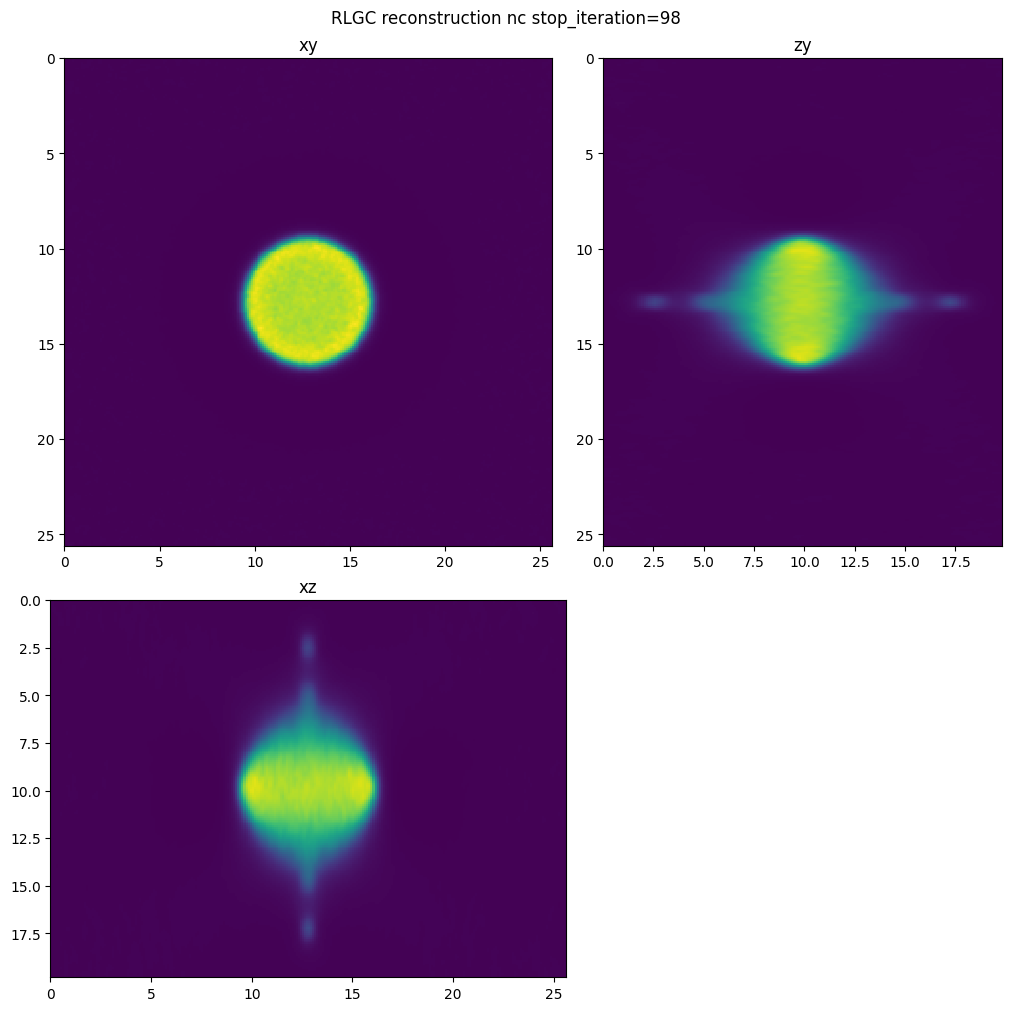

In [17]:

fig = show_xyz_slice_center(best_recon, sxy=x_voxel_size, sz=z_voxel_size, vmax = best_recon.max())
fig.suptitle(f'RLGC best reconstruction stop iteration={stop_iteration}')

fig = show_xyz_slice_center(best_recon_nc, sxy=x_voxel_size, sz=z_voxel_size, vmax = best_recon_nc.max())
fig.suptitle(f'RLGC reconstruction nc stop_iteration={stop_iteration_nc}')

Text(0.5, 0.98, 'RLGC nc iteration=300')

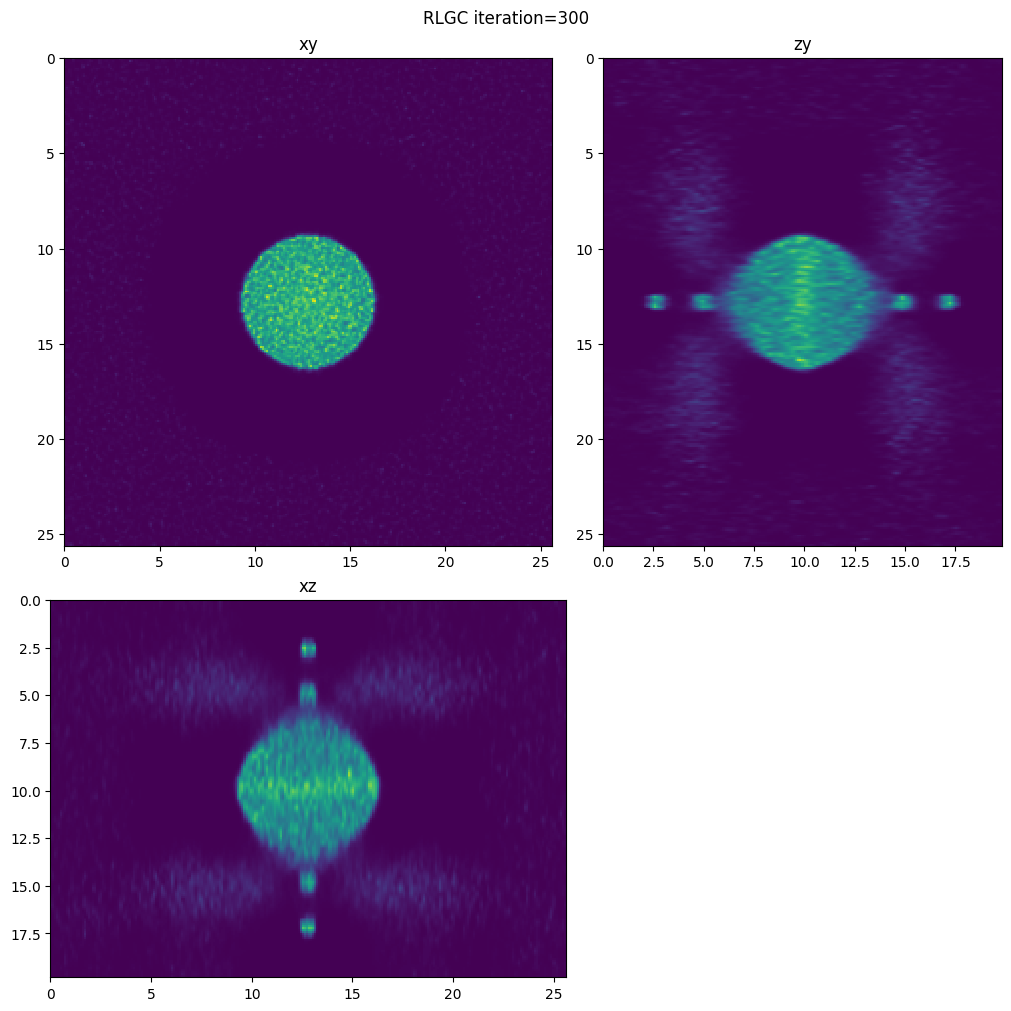

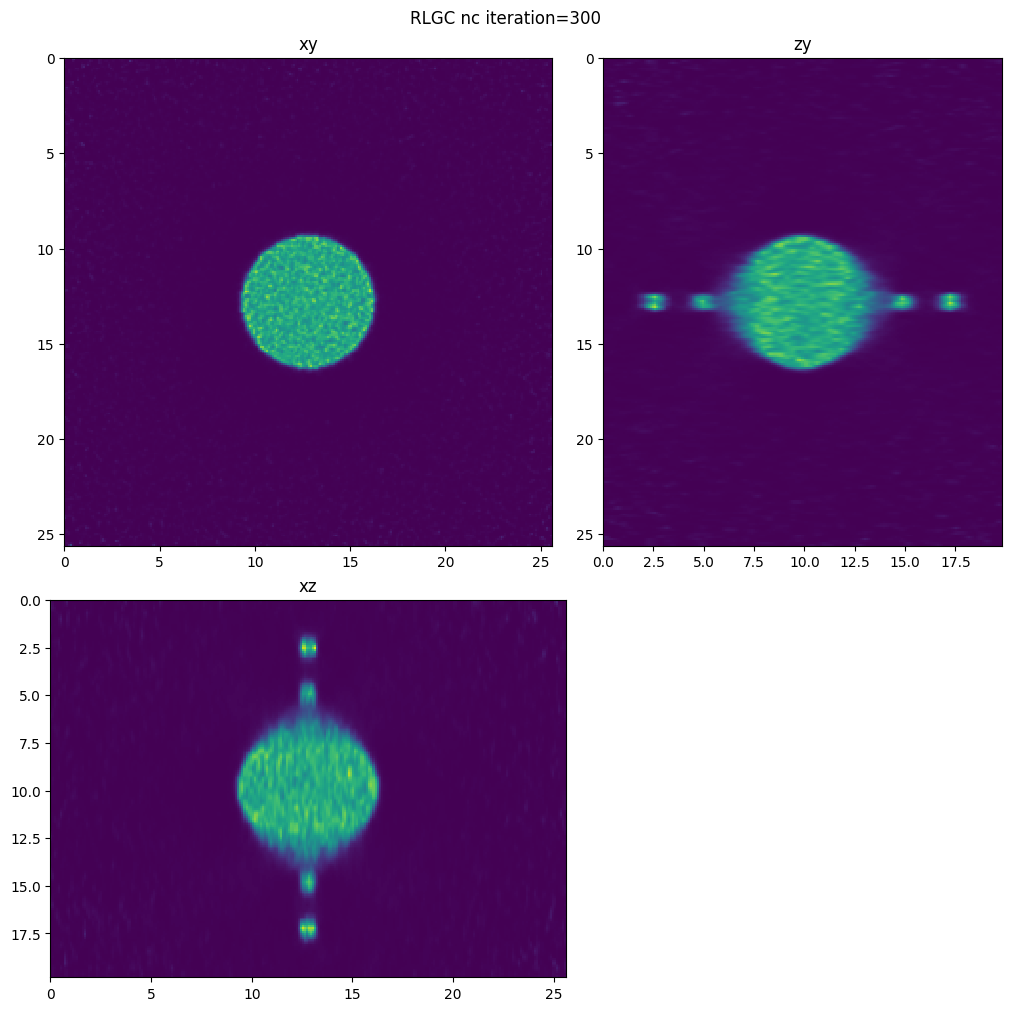

In [18]:

fig = show_xyz_slice_center(recon, sxy=x_voxel_size, sz=z_voxel_size, vmax = recon.max())
fig.suptitle(f'RLGC iteration={300}')

fig = show_xyz_slice_center(recon_nc, sxy=x_voxel_size, sz=z_voxel_size, vmax = recon_nc.max())
fig.suptitle(f'RLGC nc iteration={300}')

In [77]:

from clij2fft.richardson_lucy import richardson_lucy_nc, richardson_lucy
recon_clij2_rl_1000 = richardson_lucy_nc(im, psf_to_use, 1000)

get lib
calling convcorr 0 0


2 warnings generated.
2 warnings generated.



platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 
Richardson Lucy Finished


In [ ]:

recon_clij2_rlnc_100 = richardson_lucy_nc(im, psf_forward, 100, .0001)
recon_clij2_rlnc_1000 = richardson_lucy_nc(im, psf_forward, 1000, .0001)
recon_clij2_rlnc_10000 = richardson_lucy_nc(im, psf_forward, 10000, .0001)

get lib
calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished
get lib
calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 
Richardson Lucy Finished
get lib
calling convcorr 0 0

platform 0 NVIDIA CUDA
device name 0 NVIDIA GeForce RTX 4070 Laptop GPU

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 

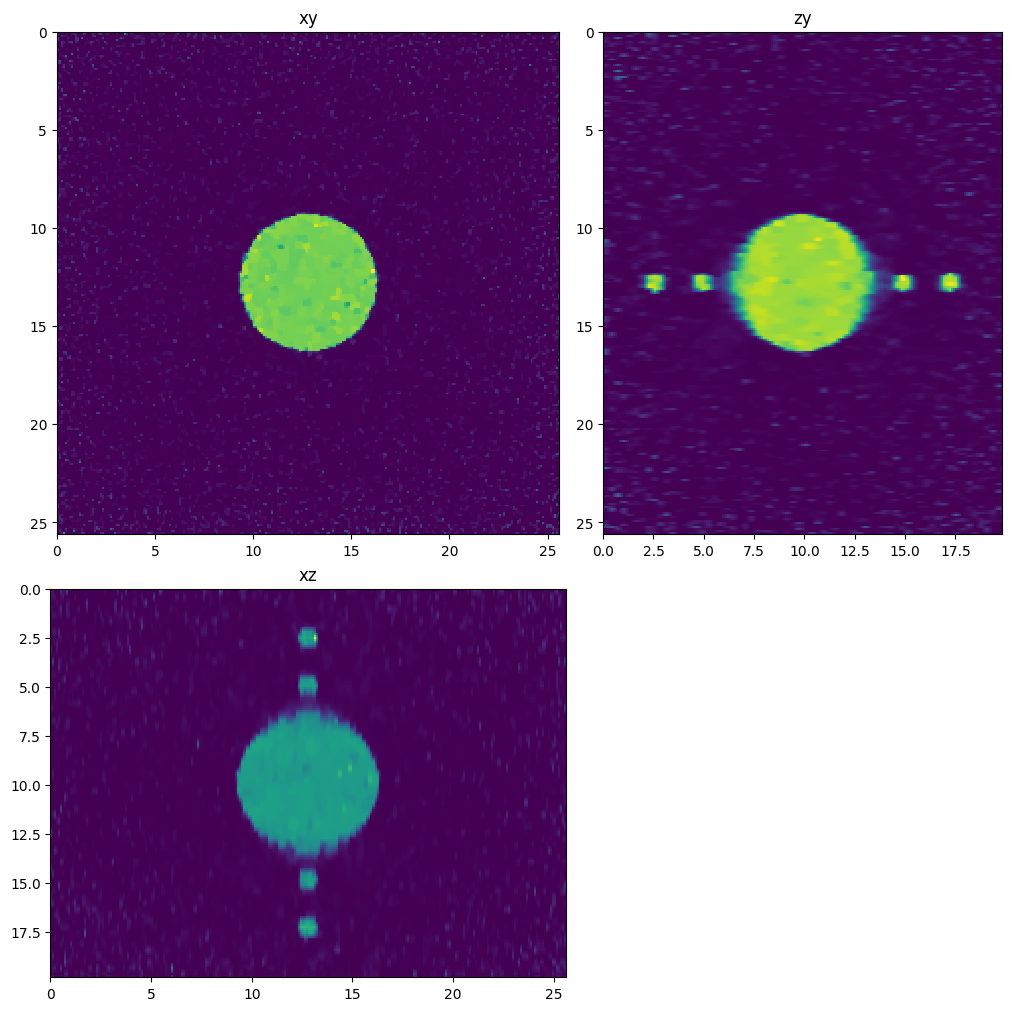

In [53]:
fig = show_xyz_slice_center(recon_clij2_rlnc_10000, sxy=x_voxel_size, sz=z_voxel_size)

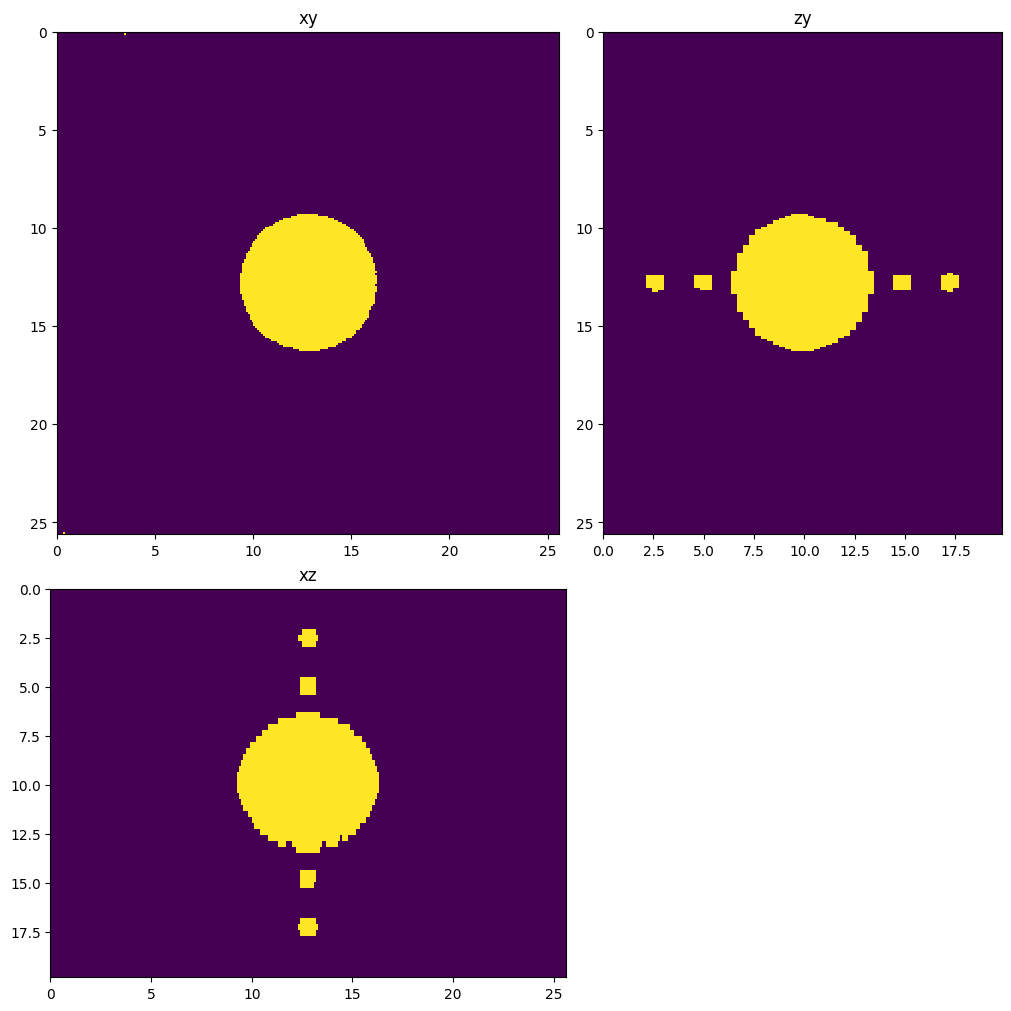

In [54]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(recon_clij2_rlnc)
thresholded = recon_clij2_rlnc > thresh

fig = show_xyz_slice_center(thresholded, sxy=x_voxel_size, sz=z_voxel_size)


## View in Napari

In [78]:
import napari

viewer = napari.Viewer()
viewer.add_image(phantom, name='phantom')
viewer.add_image(im, name='forward')
viewer.add_image(best_recon, name='best_recon')
viewer.add_image(recon, name='recon')
viewer.add_image(recon_clij2_rl_1000, name='recon clij2_rl 1000')
viewer.add_image(recon_clij2_rlnc_100, name='recon clij2_rlnc')# import otsu from skimage
viewer.add_image(recon_clij2_rlnc_1000, name='recon clij2_rlnc 1000')
viewer.add_image(recon_clij2_rlnc_10000, name='recon clij2_rlnc 10000')
viewer.add_image(thresholded, name='thresholded')

<Image layer 'thresholded' at 0x726e887d8f80>

## Look at error

In [56]:
from tnia.metrics.errors import RMSE

print('RMSE (phantom, phantom)', RMSE(phantom, phantom))
print('RMSE (phantom, im)', RMSE(phantom, im))
print('RMSE (phantom, decon 1)', RMSE(phantom, recon))
print('RMSE (phantom, decon 1)', RMSE(phantom, best_recon))
print('RMSE (phantom, decon 2)', RMSE(phantom, recon_nc))
print('RMSE (phantom, decon 2)', RMSE(phantom, best_recon_nc))
print('RMSE (phantom, decon 2)', RMSE(phantom, recon_clij2_rlnc_100))
print('RMSE (phantom, decon 2)', RMSE(phantom, recon_clij2_rlnc_1000))
print('RMSE (phantom, decon 2)', RMSE(phantom, recon_clij2_rlnc_10000))

RMSE (phantom, phantom) 0.0
RMSE (phantom, im) 976.38354
RMSE (phantom, decon 1) 684.07263
RMSE (phantom, decon 1) 689.04156
RMSE (phantom, decon 2) 317.15466
RMSE (phantom, decon 2) 407.9434
RMSE (phantom, decon 2) 405.81308
RMSE (phantom, decon 2) 288.94257
RMSE (phantom, decon 2) 468.9525


## Segment the spheres

In [57]:
# import otsu
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

def segmenter(im, min_area=0):
    
    binary = im>threshold_otsu(im)
    labels = label(binary) 
    
    # get the regions
    object_list = regionprops(labels,im)

    filtered_objects = []
    labels_filtered = np.zeros_like(labels)

    if min_area==0:
        return object_list, labels
    
    else:
        for obj in object_list:
            
            if obj.area > min_area:
                labels_filtered[labels==obj.label]=obj.label
                filtered_objects.append(obj)
        return filtered_objects, labels_filtered

In [60]:
objects_truth, labels_truth = segmenter(phantom, 20)
objects_im, labels_im = segmenter(im, 20)
objects_best_recon, labels_best_recon = segmenter(best_recon, 20)   
objects_recon, labels_recon = segmenter(recon, 20)
objects_clij2_rlnc_100, labels_clij2_rlnc_100 = segmenter(recon_clij2_rlnc_100, 20)
objects_clij2_rlnc_1000, labels_clij2_rlnc_1000 = segmenter(recon_clij2_rlnc_1000, 20)
objects_clij2_rlnc_10000, labels_clij2_rlnc_10000 = segmenter(recon_clij2_rlnc_10000, 20)


print('objects_truth', len(objects_truth))
print('objects_im', len(objects_im))
print('objects_best_recon', len(objects_best_recon))
print('objects_recon', len(objects_recon))
print('objects_clij2_rlnc_100', len(objects_clij2_rlnc_100))
print('objects_clij2_rlnc_1000', len(objects_clij2_rlnc_1000))
print('objects_clij2_rlnc_10000', len(objects_clij2_rlnc_10000))

objects_truth 5
objects_im 1
objects_best_recon 1
objects_recon 3
objects_clij2_rlnc_100 1
objects_clij2_rlnc_1000 5
objects_clij2_rlnc_10000 5


## Make figures of segmentations

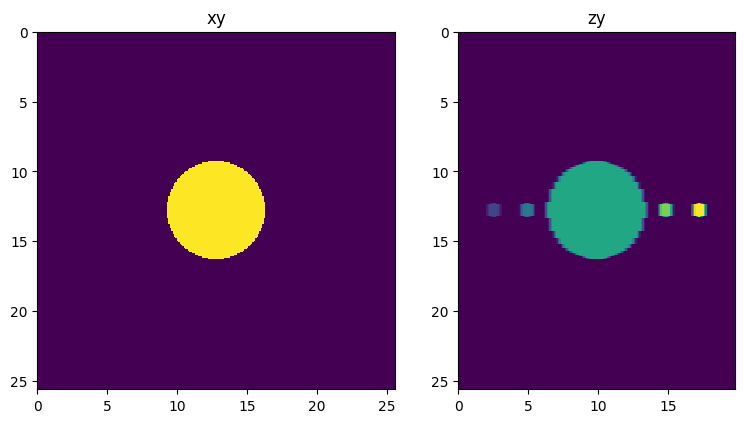

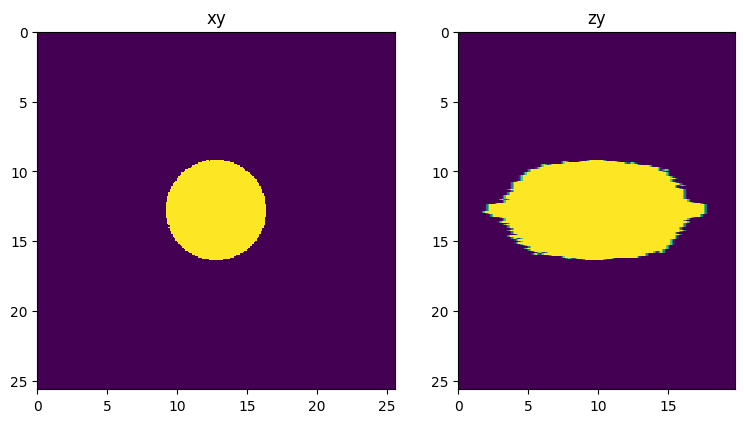

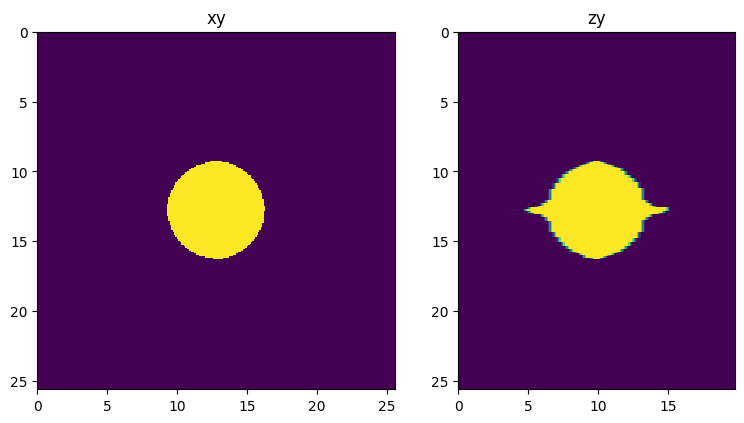

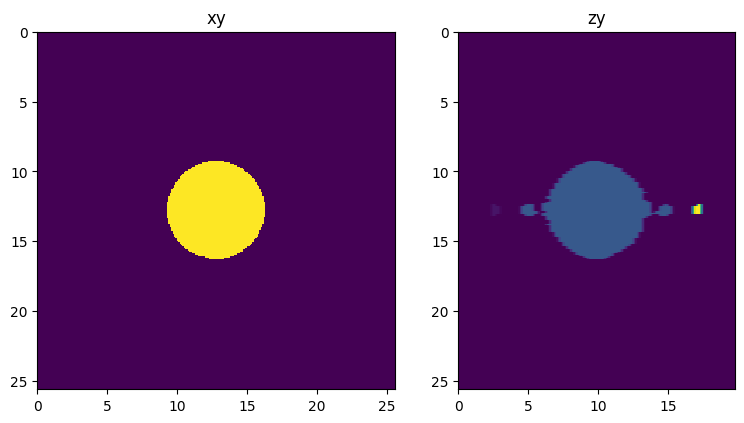

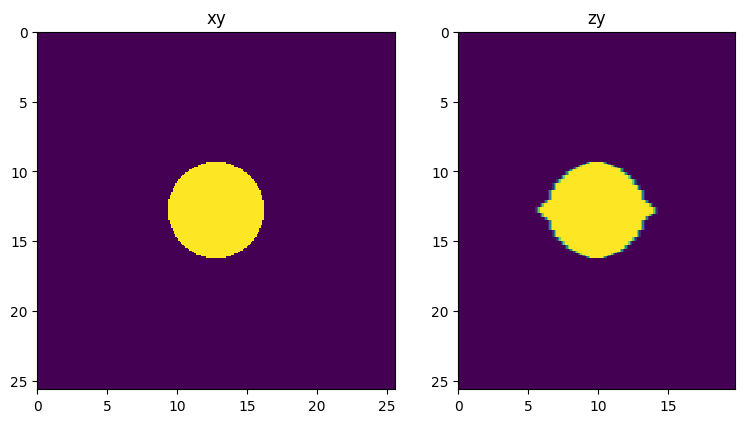

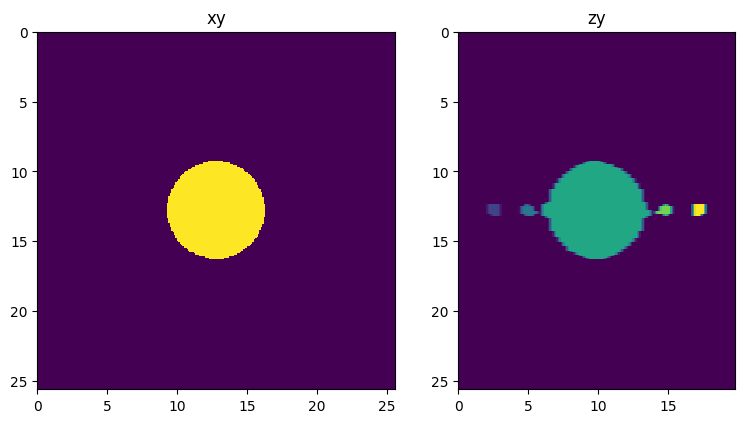

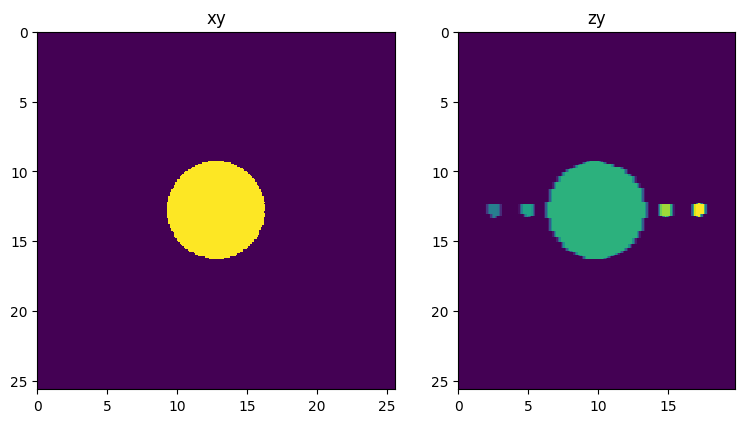

In [62]:
from tnia.plotting.projections import show_xy_xz_slice
from tnia.plotting.projections import show_xy_xz
from matplotlib import pyplot as plt

from tnia.plotting.projections import show_xy_zy_slice_center
from tnia.plotting.plt_helper import random_label_cmap

fig = show_xy_zy_slice_center(labels_truth, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_im, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_best_recon, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_recon, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_clij2_rlnc_100, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_clij2_rlnc_1000, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))
fig = show_xy_zy_slice_center(labels_clij2_rlnc_10000, sxy=x_voxel_size, sz=z_voxel_size, figsize=(9,6))

## Segmentation results

In [69]:
def print_objects(objects):
    for obj in objects:
        print(f'Object {obj.label}: Area = {obj.area}, Mean Intensity = {obj.mean_intensity}')
    print()

print_objects(objects_truth)
'''
print_objects(objects_im)
print_objects(objects_best_recon)
print_objects(objects_recon)
print_objects(objects_clij2_rlnc_100)
print_objects(objects_clij2_rlnc_1000)
'''
print_objects(objects_clij2_rlnc_1000)
print_objects(objects_clij2_rlnc_10000)

Object 1: Area = 184.0, Mean Intensity = 10000.0
Object 2: Area = 184.0, Mean Intensity = 10000.0
Object 3: Area = 59896.0, Mean Intensity = 10000.0
Object 4: Area = 184.0, Mean Intensity = 10000.0
Object 5: Area = 184.0, Mean Intensity = 10000.0

Object 1: Area = 141.0, Mean Intensity = 8722.12109375
Object 2: Area = 123.0, Mean Intensity = 7257.91552734375
Object 3: Area = 58205.0, Mean Intensity = 9635.15234375
Object 4: Area = 113.0, Mean Intensity = 7712.13671875
Object 5: Area = 137.0, Mean Intensity = 8846.2197265625

Object 295: Area = 176.0, Mean Intensity = 9354.4306640625
Object 402: Area = 164.0, Mean Intensity = 8823.818359375
Object 443: Area = 59401.0, Mean Intensity = 9850.71875
Object 593: Area = 161.0, Mean Intensity = 8933.12890625
Object 691: Area = 170.0, Mean Intensity = 9444.1201171875



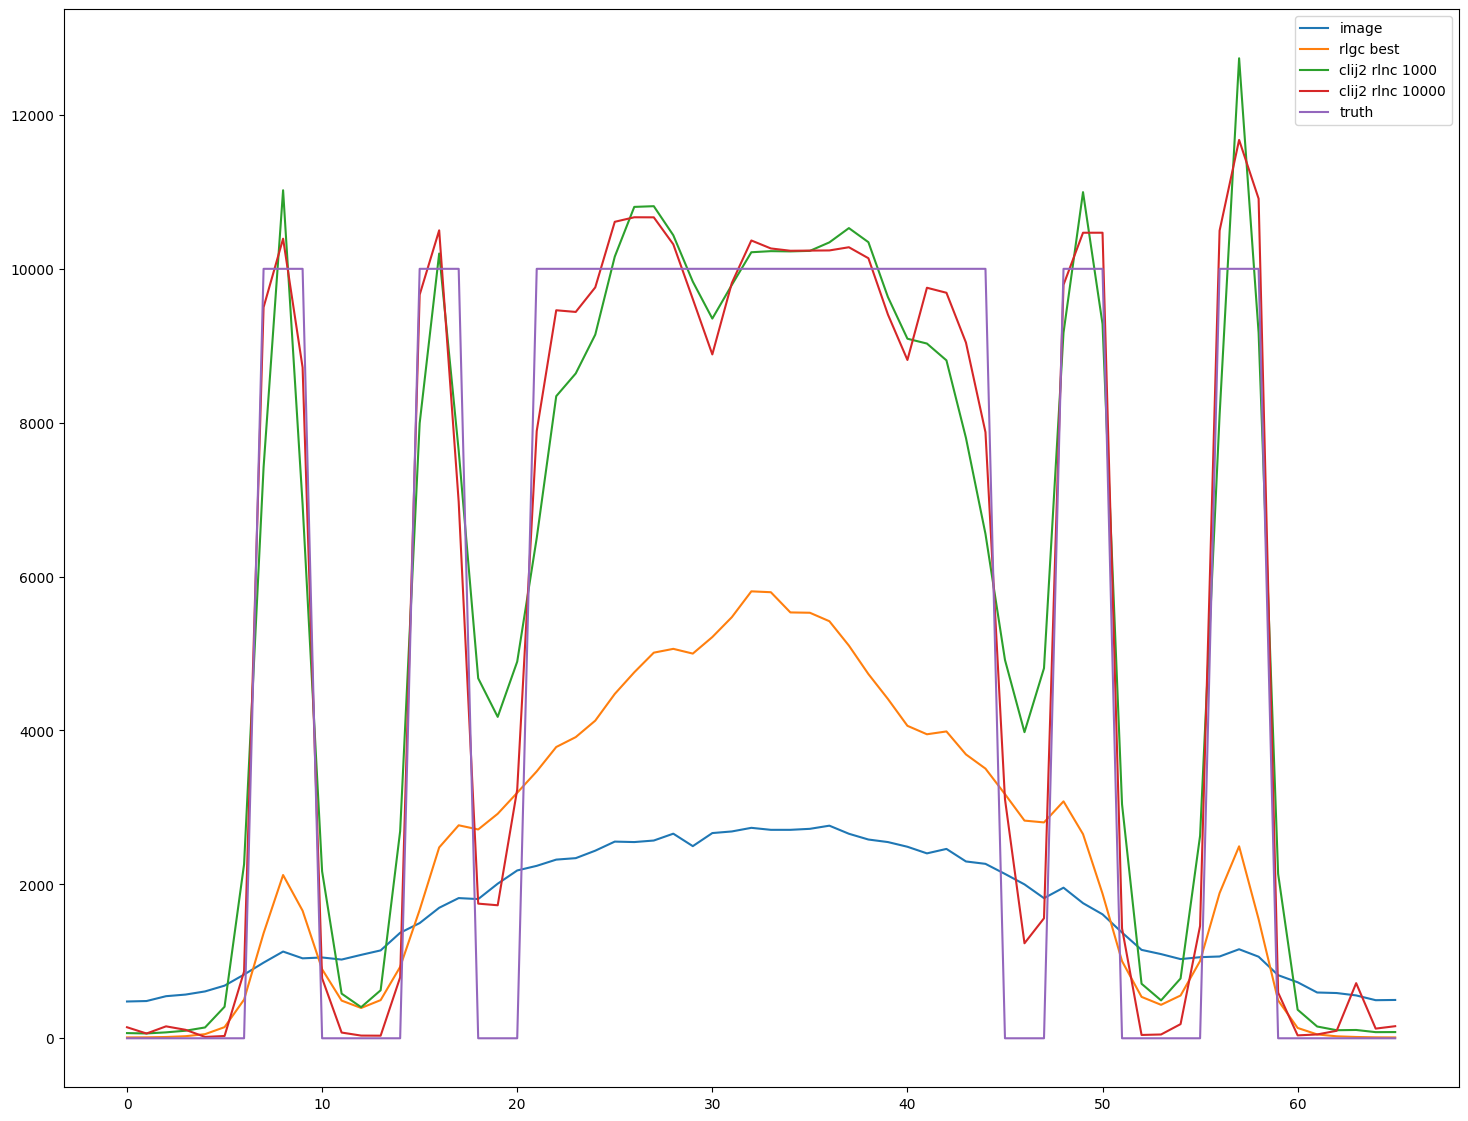

In [72]:
import matplotlib.pyplot as plt
s=im.shape

fig, ax = plt.subplots(figsize=(18,14))

line_z=int(s[0]//2)
line_y=int(s[1]//2)
line_x=int(s[2]//2)

index = np.s_[:, line_y, line_x]

line=im[index]
ax.plot(line, label = 'image')

line=best_recon[index]
ax.plot(line, label='rlgc best')

#line=recon[index]
#ax.plot(line, label='rlgc 300')

#line=recon_clij2_rlnc_100[index]
#ax.plot(line, label='clij2 rlnc 100')

line=recon_clij2_rlnc_1000[index]
ax.plot(line, label='clij2 rlnc 1000')

line=recon_clij2_rlnc_10000[index]
ax.plot(line, label='clij2 rlnc 10000')

line=phantom[index]
ax.plot(line, label='truth')

ax.legend()

# View in Napari

In [20]:
import napari
viewer = napari.Viewer()
viewer.add_image(phantom, scale=[3,1,1],name='phantom')
viewer.add_image(im, scale=[3,1,1],name='im')
viewer.add_image(decon1, scale=[3,1,1],name='decon 1')
viewer.add_image(decon2, scale=[3,1,1],name='decon 2')
viewer.add_labels(labels_im, scale=[3,1,1],name='labels_im')
viewer.add_labels(labels_decon1, scale=[3,1,1],name='labels_decon 1')
viewer.add_labels(labels_decon2, scale=[3,1,1],name='labels_decon 2')


napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Labels layer 'labels_decon 2' at 0x1f89918ac70>